In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Testbed(object):
    def __init__(self, k):
        self.k = k
        self.action_count = np.zeros(k)
        self.best_action = 0
        self.reset()

    def reset(self):
        self.action_count = np.random.randn(self.k)
        self.best_action = np.argmax(self.action_count)

In [3]:
class Agent(object):
    def __init__(self,k,epsilon=0,initial=0.):
        self.k = k
        self.epsilon = epsilon
        self.initial = initial
        
    def action(self): 
        if np.random.random() < self.epsilon:
            self.A = np.random.choice(len(self.qEstimate))
            return self.A
        else:  
            action = np.where(self.qEstimate == np.argmax(self.qEstimate))[0]
            if len(action) == 0:
                self.A = np.argmax(self.qEstimate) #probability 1-𝞮
                return self.A 
            else:
                self.A = np.random.choice(action) #probability 𝞮
                return self.A

    def step(self, reward):
        a = self.A
        self.𝜶_k[a] += 1  
        self.qEstimate[a] += (reward - self.qEstimate[a])*0.1 #constant step-size 0.1
    def reset(self):
        self.A = None
        self.𝜶_k = np.zeros(self.k)
        self.qEstimate = np.zeros(self.k) + self.initial

In [4]:
def simulate(testbed, agent, timeSteps, runs):
    rewards = np.array([0.]*timeSteps)
    best_action = np.array([0.]*timeSteps)
    for i in range(runs):
        if (i%500) == 0:
            print(str(runs-i)+" steps remaining")
        testbed.reset() #reset the test bed for each iteration
        agent.reset() #reset the agent for each iteration
        for j in range(timeSteps):
            A_t = agent.action() #action at time step t 
            R_t = np.random.normal(testbed.action_count[A_t], 1) #actual reward selected from normal distribution with mean q*(A_t) and variance 1
            agent.step(R_t) #incremental steps for updating averages
            rewards[j] += R_t 
            if A_t == testbed.best_action:
                best_action[j] += 1
    return rewards/runs, best_action/runs

In [5]:
k = 10
runs = 2000
timeSteps = 1000
agents = [Agent(k,0,5), Agent(k,0.1,0)]
avg_reward = []
optimal_action = []

for agent in agents:
    a, b = simulate(Testbed(k), agent, timeSteps, runs)
    avg_reward.append(a.tolist())
    optimal_action.append(b.tolist())

2000 steps remaining
1500 steps remaining
1000 steps remaining
500 steps remaining
2000 steps remaining
1500 steps remaining
1000 steps remaining
500 steps remaining


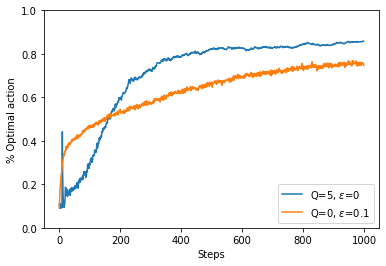

In [6]:
plt.plot(optimal_action[0], label=r'Q=5, $\varepsilon$=0')
plt.plot(optimal_action[1], label=r'Q=0, $\varepsilon$=0.1')
plt.legend(loc=4)
plt.ylim(0,1)
plt.ylabel('% Optimal action')
plt.xlabel('Steps')
plt.savefig('fig_2_3.jpg')
plt.show()